In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [549]:
credit_risk_df = pd.read_csv("/home/raghu/Downloads/Datasets/credit_risk/credit_customers.csv")

In [550]:
credit_risk_df.isna().sum()
#our dataset is cleaned already

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [551]:
credit_risk_df.drop_duplicates()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


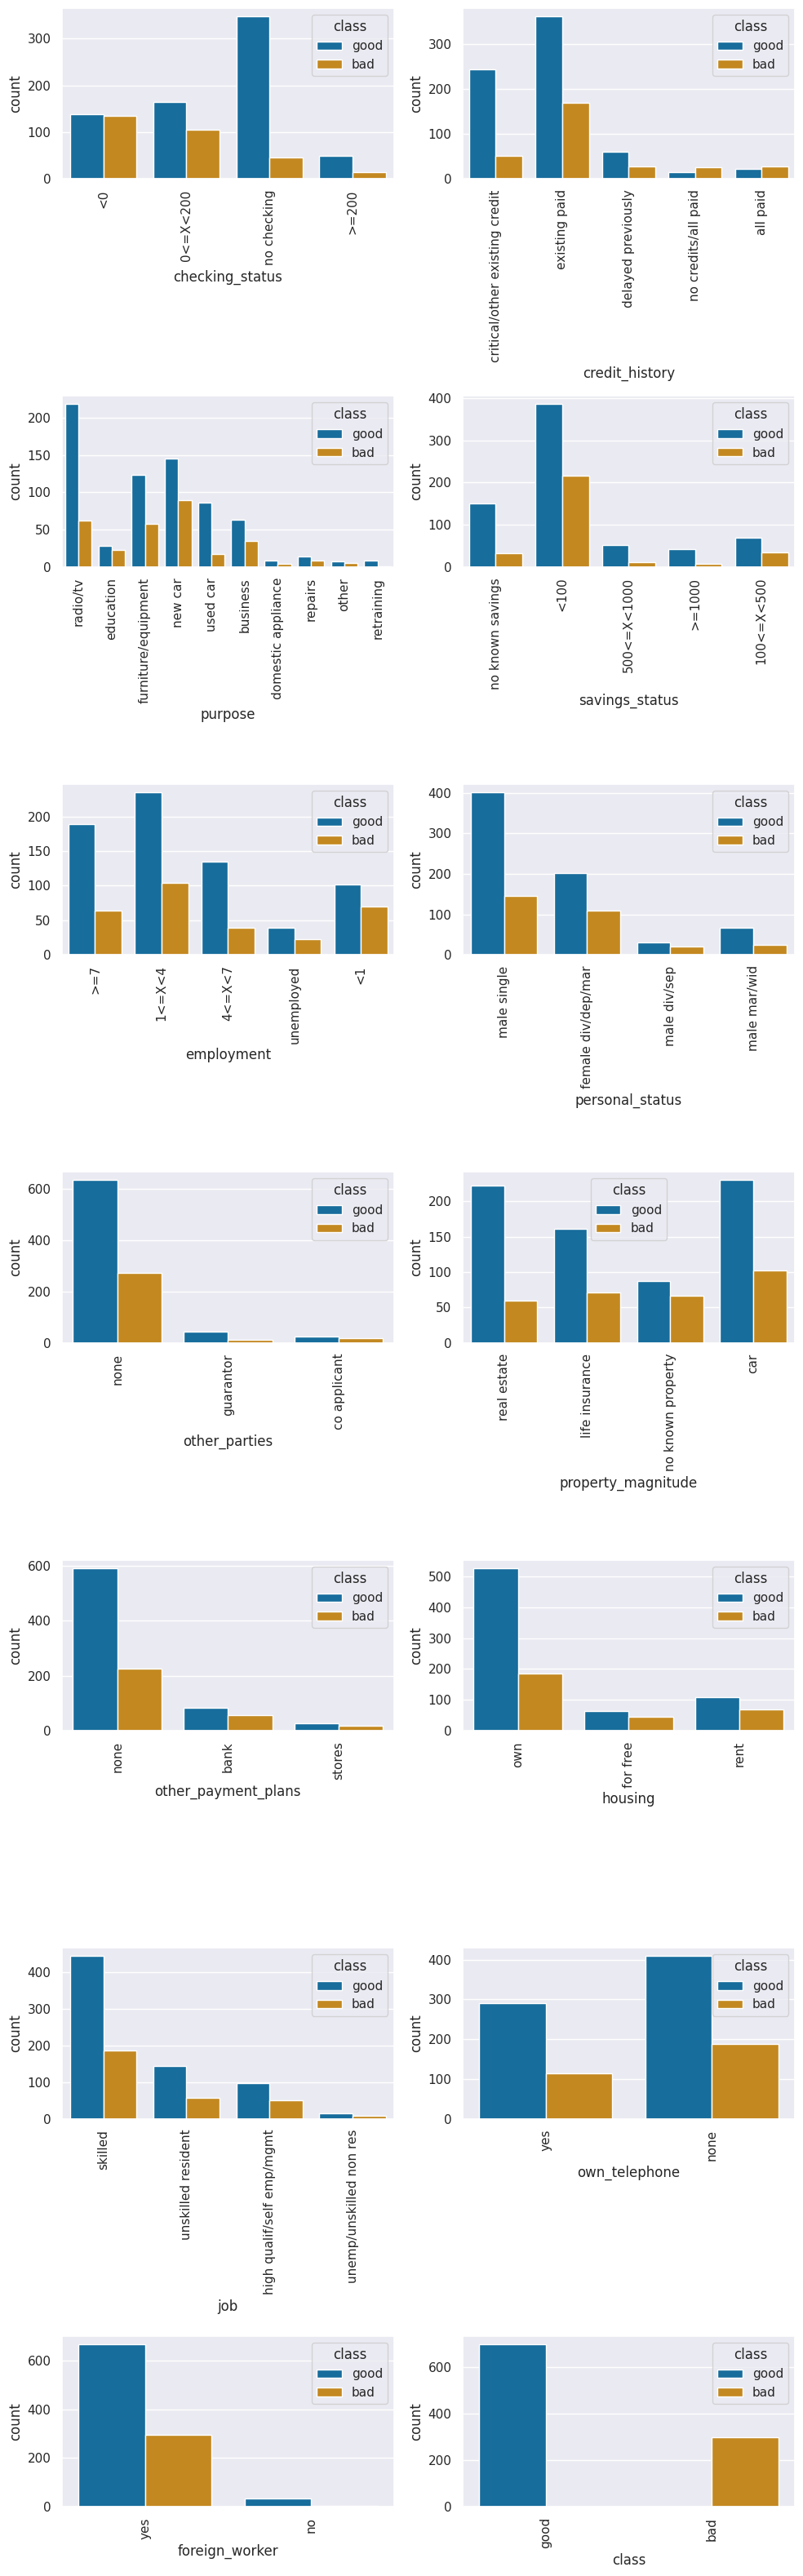

In [552]:
sns.set_theme(style='darkgrid',palette='colorblind')
plt.figure(figsize=(10,50))
category_list = credit_risk_df.select_dtypes(include='object').columns

x = 0
for i in category_list:
    x+=1
    plt.subplot(11,2,x)
    plt.xticks(rotation=90) #used to display the xlabel horizontally
    sns.countplot(x=i,hue='class',data=credit_risk_df)
    if x ==1 or x == 2:
        plt.tight_layout()

In [553]:
#there are generally five types of style features in the seaborn
#dark,white,darkgrid,whitegrid,ticks
#pastel here represent the different colors used to plot the categorical variable
#deep bright pastel nuted colorbind.

#learning rate of the neural network
#fixed learning rate:- simple to implement and it is constant learning rate
#AdaGrad:- it automatically update learning rate
#

#different types of learning rates
#fixed, adaptive schedule learning rate
#
credit_risk_df['job'].unique()


array(['skilled', 'unskilled resident', 'high qualif/self emp/mgmt',
       'unemp/unskilled non res'], dtype=object)

In [554]:
def purpose_processing(text):
    token = text.split('/')
    if (len(token)) == 2 or (len(token)) == 3:
        return token[0]
    else:
        return text

In [555]:
credit_risk_df['purpose'] = credit_risk_df['purpose'].apply(purpose_processing)
credit_risk_df['credit_history'] = credit_risk_df['credit_history'].apply(purpose_processing)
credit_risk_df['job'] = credit_risk_df['job'].apply(purpose_processing)
#our purpose column got filtered with the all type of noise data
#we can now work with the other uncleaned data

In [556]:
credit_risk_df['purpose'].value_counts()

radio                 280
new car               234
furniture             181
used car              103
business               97
education              50
repairs                22
domestic appliance     12
other                  12
retraining              9
Name: purpose, dtype: int64

In [557]:
credit_risk_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical,radio,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [558]:
credit_risk_df['credit_history'].unique()

array(['critical', 'existing paid', 'delayed previously', 'no credits',
       'all paid'], dtype=object)

In [559]:
#labeling the data and giving it numeric essence
#critical : 0
#existing paid : 1
#delayed previously : 2
#no credits : 3
#all paid : 4
credit_risk_df['credit_history'] = credit_risk_df['credit_history'].replace({'critical':0,'existing paid':1,'delayed previously':2,'no credits':3,'all paid':4})

In [560]:
credit_risk_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,0,radio,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,1,radio,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,0,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,1,furniture,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,2,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [561]:
#deleting the unusable columns
credit_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int64  
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [562]:
credit_risk_df = credit_risk_df.drop(['personal_status','age','own_telephone','purpose','foreign_worker','other_payment_plans','checking_status'],axis = 1)

In [563]:
#function to handle the employment duration of the dataset
#it just split the dataset 
def cal_employee_work_period(text):
    token = text.split('<')
    if (len(token)) == 3:
        return ((int(token[0]) + int(token[2]))//2)
    else:
        token = text.split('=')
        if (len(token)) == 2:
            return token[1]
        else: return 0

In [564]:
#total time of employment
credit_risk_df['employment'] = credit_risk_df['employment'].apply(cal_employee_work_period)

#total money saved in the account
credit_risk_df['savings_status'] = credit_risk_df['savings_status'].apply(cal_employee_work_period)

In [565]:
#encoding the target column
credit_risk_df['class'] = credit_risk_df['class'].replace({'good':1,'bad':0})

#encoding the housing attribute
credit_risk_df['housing'] = credit_risk_df['housing'].replace({'own':2,'rent':1,'for free':0})

In [566]:

credit_risk_df['savings_status'].value_counts()


0       786
300     103
750      63
1000     48
Name: savings_status, dtype: int64

In [567]:
credit_risk_df['job'].unique()

array(['skilled', 'unskilled resident', 'high qualif', 'unemp'],
      dtype=object)

In [568]:
#we can encode the job profile with
#unemp:0
#unskillled:1
#skilled:2
#high qualif:3
credit_risk_df['job'] = credit_risk_df['job'].replace({'unemp':0,'unskilled resident':1,'skilled':2,'high qualif':3})

In [569]:
credit_risk_df.head()

,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,property_magnitude,housing,existing_credits,job,num_dependents,class
0,6.0,0,1169.0,0,7,4.0,none,4.0,real estate,2,2.0,2,1.0,1
1,48.0,1,5951.0,0,2,2.0,none,2.0,real estate,2,1.0,2,1.0,0
2,12.0,0,2096.0,0,5,2.0,none,3.0,real estate,2,1.0,1,2.0,1
3,42.0,1,7882.0,0,5,2.0,guarantor,4.0,life insurance,0,1.0,2,2.0,1
4,24.0,2,4870.0,0,2,3.0,none,4.0,no known property,0,2.0,2,2.0,0


In [570]:
credit_risk_df['job'].unique()

array([2, 1, 3, 0])

In [571]:
credit_risk_df['property_magnitude'].unique()

array(['real estate', 'life insurance', 'no known property', 'car'],
      dtype=object)

In [572]:
#it is important for the bank to lend the money to whom 
#it can easily retrieve
#real estate:3
#life insuranve:2
#car:1
#no known property:0
credit_risk_df['property_magnitude'] = credit_risk_df['property_magnitude'].replace({'no known property':0,'car':1,'life insurance':2,'real estate':3})

In [573]:
credit_risk_df['other_parties'].unique()

array(['none', 'guarantor', 'co applicant'], dtype=object)

In [574]:
#other parties can also help in lending money
#it uses the details
credit_risk_df['other_parties'] = credit_risk_df['other_parties'].replace({'none':0,'co applicant':1,'guarantor':2})

In [575]:
credit_risk_df.head()

,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,property_magnitude,housing,existing_credits,job,num_dependents,class
0,6.0,0,1169.0,0,7,4.0,0,4.0,3,2,2.0,2,1.0,1
1,48.0,1,5951.0,0,2,2.0,0,2.0,3,2,1.0,2,1.0,0
2,12.0,0,2096.0,0,5,2.0,0,3.0,3,2,1.0,1,2.0,1
3,42.0,1,7882.0,0,5,2.0,2,4.0,2,0,1.0,2,2.0,1
4,24.0,2,4870.0,0,2,3.0,0,4.0,0,0,2.0,2,2.0,0


In [576]:
#data spiliting
x = credit_risk_df.iloc[:,:-1]
y = credit_risk_df.iloc[:,-1]

In [577]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [578]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/home/raghu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [579]:
y_pred = lr.predict(x_test)

In [580]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.735


In [581]:
lr.coef_

array([[-2.10538015e-02, -3.88442377e-01, -1.62356639e-05,
         8.97509910e-04,  1.45195149e-01, -8.04756075e-02,
         5.40757427e-02,  2.38391369e-02,  2.94581453e-01,
         2.91721063e-01,  9.00492295e-02,  8.67005626e-02,
         7.78125555e-02]])

In [582]:
lr.intercept_

array([0.07523627])

In [588]:
sns.barplot(x=credit_risk_df.columns,data=lr.coef_)

AttributeError: 'numpy.ndarray' object has no attribute 'get'